# IDS 2023 Project

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
df_xG = pd.read_csv("npxG.csv", sep = ",")
df_xG.head()

,Rk,Team,Date,npxG,Opp
0,1,Manchester Utd,2023-05-25,4.4,Chelsea
1,2,Manchester Utd,2023-02-19,4.4,Leicester City
2,3,Manchester City,2021-08-28,4.4,Arsenal
3,4,Newcastle Utd,2023-04-30,4.3,Southampton
4,5,Manchester City,2022-12-28,4.3,Leeds United


In [3]:
df_xG['Team'].value_counts()

Tottenham          91
Manchester Utd     90
Arsenal            90
Wolves             90
Everton            90
Crystal Palace     90
Manchester City    90
Brentford          90
West Ham           90
Aston Villa        90
Brighton           90
Chelsea            90
Liverpool          90
Newcastle Utd      90
Southampton        76
Leeds United       76
Leicester City     75
Bournemouth        52
Nott'ham Forest    52
Fulham             52
Burnley            52
Watford            38
Norwich City       38
Luton Town         14
Sheffield Utd      14
Name: Team, dtype: int64

In [4]:
df_xG['Opp'].str.strip()

0               Chelsea
1        Leicester City
2               Arsenal
3           Southampton
4          Leeds United
             ...       
1795            Chelsea
1796     Crystal Palace
1797    Manchester City
1798            Arsenal
1799            Arsenal
Name: Opp, Length: 1800, dtype: object

In [5]:
df_xG['Opp'].value_counts()

Everton            91
Chelsea            90
Liverpool          90
Crystal Palace     90
Newcastle Utd      90
Wolves             90
Aston Villa        90
West Ham           90
Brentford          90
Manchester Utd     90
Tottenham          90
Brighton           90
Arsenal            90
Manchester City    90
Leicester City     76
Southampton        76
Leeds United       75
Nott'ham Forest    52
Bournemouth        52
Fulham             52
Burnley            52
Norwich City       38
Watford            38
Sheffield Utd      14
Luton Town         14
Name: Opp, dtype: int64

Note that Everton should have 90 games, not 91 and Leeds United should have 76 games, not 75.

In [6]:
df_PSxG_GA = pd.read_csv("PSxG-GA.csv", sep = ",")
df_PSxG_GA[-5:]

,Rk,Team,Date,PSxG+/-,Opp
1795,1796,Wolves,2023-03-18,-3.3,Leeds United
1796,1797,Bournemouth,2023-11-04,-3.4,Manchester City
1797,1798,Leeds United,2021-08-14,-3.4,Manchester Utd
1798,1799,Bournemouth,2022-08-27,-4.1,Liverpool
1799,1800,Leeds United,2021-12-14,-4.7,Manchester City


In [7]:
df_PSxG_GA['Team'].value_counts()

Everton            91
Wolves             90
Newcastle Utd      90
Manchester City    90
Brighton           90
Arsenal            90
West Ham           90
Aston Villa        90
Brentford          90
Liverpool          90
Manchester Utd     90
Crystal Palace     90
Tottenham          90
Chelsea            89
Southampton        76
Leicester City     76
Leeds United       76
Burnley            52
Fulham             52
Bournemouth        52
Nott'ham Forest    52
Norwich City       38
Watford            38
Luton Town         14
Sheffield Utd      14
Name: Team, dtype: int64

In [8]:
df_PSxG_GA['Opp'].str.strip()

0               Everton
1             Tottenham
2              Brighton
3           Aston Villa
4             Brentford
             ...       
1795       Leeds United
1796    Manchester City
1797     Manchester Utd
1798          Liverpool
1799    Manchester City
Name: Opp, Length: 1800, dtype: object

In [9]:
df_PSxG_GA['Opp'].value_counts()

Everton            90
Chelsea            90
Wolves             90
Manchester City    90
Arsenal            90
Liverpool          90
Tottenham          90
Crystal Palace     90
Manchester Utd     90
West Ham           90
Brentford          90
Aston Villa        90
Brighton           90
Newcastle Utd      89
Leeds United       76
Southampton        76
Leicester City     76
Bournemouth        53
Nott'ham Forest    52
Fulham             52
Burnley            52
Norwich City       38
Watford            38
Sheffield Utd      14
Luton Town         14
Name: Opp, dtype: int64

# Date to season conversion

In [10]:
def dateToSeason(df):
    season = []
    for i, row in df.iterrows():
        date = row['Date']
        year = date[:4]
        month = int(date[5:7])
        if year == "2021":
            season.append("21/22")
        elif year == "2022" and month <7:
            season.append("21/22")
        elif year == "2022" and month >=7:
            season.append("22/23")
        elif year == "2023" and month <7:
            season.append("22/23")
        else:
            season.append("23/24")
    return season

df_xG['Season'] = dateToSeason(df_xG)
df_PSxG_GA['Season'] = dateToSeason(df_PSxG_GA)

Checking that the df_xG table has correct amount of games for each season

In [11]:
df_xG

,Rk,Team,Date,npxG,Opp,Season
0,1,Manchester Utd,2023-05-25,4.4,Chelsea,22/23
1,2,Manchester Utd,2023-02-19,4.4,Leicester City,22/23
2,3,Manchester City,2021-08-28,4.4,Arsenal,21/22
3,4,Newcastle Utd,2023-04-30,4.3,Southampton,22/23
4,5,Manchester City,2022-12-28,4.3,Leeds United,22/23
...,...,...,...,...,...,...
1795,1796,Norwich City,2021-10-23,0.1,Chelsea,21/22
1796,1797,Tottenham,2021-09-11,0.1,Crystal Palace,21/22
1797,1798,Norwich City,2021-08-21,0.1,Manchester City,21/22
1798,1799,Sheffield Utd,2023-10-28,0.0,Arsenal,23/24


We can see that the number of games is correct, games in a season:

38 matchweeks * 20 teams = 780 games

Season 23/24: 14 matchweeks * 20 teams = 280 games

Note that the number of actual games is these scores divided by two, we are counting each game twice.

In [12]:
df_xG["Season"].value_counts()

22/23    760
21/22    760
23/24    280
Name: Season, dtype: int64

Checking that the df_PSxG_GA table has correct amount of games for each season

In [13]:
df_PSxG_GA

,Rk,Team,Date,PSxG+/-,Opp,Season
0,1,Fulham,2023-08-12,3.3,Everton,23/24
1,2,Arsenal,2023-01-15,2.5,Tottenham,22/23
2,3,Crystal Palace,2022-01-14,2.3,Brighton,21/22
3,4,Chelsea,2022-10-16,2.2,Aston Villa,22/23
4,5,Manchester Utd,2022-01-19,2.2,Brentford,21/22
...,...,...,...,...,...,...
1795,1796,Wolves,2023-03-18,-3.3,Leeds United,22/23
1796,1797,Bournemouth,2023-11-04,-3.4,Manchester City,23/24
1797,1798,Leeds United,2021-08-14,-3.4,Manchester Utd,21/22
1798,1799,Bournemouth,2022-08-27,-4.1,Liverpool,22/23


In [14]:
df_PSxG_GA["Season"].value_counts()

22/23    760
21/22    760
23/24    280
Name: Season, dtype: int64

# Finding errors (df_xG)

First, in df_xG let's search for Everton games and search where is the extra game

In [15]:
Everton_21_22 = 0
Everton_22_23 = 0
Everton_23_24 = 0

for i, row in df_xG.iterrows():
    team = 'Everton'
    if row["Opp"] == team:
        if row["Season"] == "21/22":
            Everton_21_22 += 1
        if row["Season"] == "22/23":
            Everton_22_23 += 1
        if row["Season"] == "23/24":
            Everton_23_24 += 1
print(Everton_21_22)
print(Everton_22_23)
print(Everton_23_24)

39
38
14


In [16]:
Leeds_21_22 = 0
Leeds_22_23 = 0
Leeds_23_24 = 0

for i, row in df_xG.iterrows():
    team = 'Leeds United'
    if row["Opp"] == team:
        if row["Season"] == "21/22":
            Leeds_21_22 += 1
        if row["Season"] == "22/23":
            Leeds_22_23 += 1
        if row["Season"] == "23/24":
            Leeds_23_24 += 1
print(Leeds_21_22)
print(Leeds_22_23)
print(Leeds_23_24)

37
38
0


In [17]:
Tottenham_21_22 = 0
Tottenham_22_23 = 0
Tottenham_23_24 = 0

for i, row in df_xG.iterrows():
    team = 'Tottenham'
    if row["Team"] == team:
        if row["Season"] == "21/22":
            Tottenham_21_22 += 1
        if row["Season"] == "22/23":
            Tottenham_22_23 += 1
        if row["Season"] == "23/24":
            Tottenham_23_24 += 1
print(Tottenham_21_22)
print(Tottenham_22_23)
print(Tottenham_23_24)

39
38
14


In [18]:
Leicester_21_22 = 0
Leicester_22_23 = 0
Leicester_23_24 = 0

for i, row in df_xG.iterrows():
    team = 'Leicester City'
    if row["Team"] == team:
        if row["Season"] == "21/22":
            Leicester_21_22 += 1
        if row["Season"] == "22/23":
            Leicester_22_23 += 1
        if row["Season"] == "23/24":
            Leicester_23_24 += 1
print(Leicester_21_22)
print(Leicester_22_23)
print(Leicester_23_24)

37
38
0


As we can see, for the df_xG table, there is a mistake somewhere in the 21/22 season

In [19]:
for i, row in df_xG.iterrows():
    team = 'Tottenham'
    opp = 'Everton'
    if row["Team"] == team and row["Opp"] == opp and row["Season"] == "21/22":
        print(row)

Rk               140
Team       Tottenham
Date      2022-03-07
npxG             2.5
Opp          Everton
Season         21/22
Name: 139, dtype: object
Rk              1400
Team       Tottenham
Date      2021-11-07
npxG             0.7
Opp          Everton
Season         21/22
Name: 1399, dtype: object
Rk              1401
Team       Tottenham
Date      2021-11-07
npxG             0.7
Opp          Everton
Season         21/22
Name: 1400, dtype: object


In [20]:
for i, row in df_xG.iterrows():
    team = 'Leicester City'
    opp = 'Leeds United'
    if row["Team"] == team and row["Opp"] == opp and row["Season"] == "21/22":
        print(row)

Rk                  1666
Team      Leicester City
Date          2022-03-05
npxG                 0.4
Opp         Leeds United
Season             21/22
Name: 1665, dtype: object


Both combinations should have two entries, but one has 3 and other 1. So we conclude that there has been a mistake and we should replace the Tottenham - Everton extra entry with correct info.

In [21]:
for i, row in df_xG.iterrows():
    team = 'Leicester City'
    opp = 'Leeds United'
    if row["Team"] == opp and row["Opp"] == team and row["Season"] == "21/22":
        print(row)

Rk                   487
Team        Leeds United
Date          2022-03-05
npxG                 1.7
Opp       Leicester City
Season             21/22
Name: 486, dtype: object
Rk                   794
Team        Leeds United
Date          2021-11-07
npxG                 1.3
Opp       Leicester City
Season             21/22
Name: 793, dtype: object


We can also see that there was a game between Leeds and Leicester, there other combo of Leicester - Leeds hasn't been recorded. Let's replace this with correct data from here: https://fbref.com/en/matches/8fd004c6/Leeds-United-Leicester-City-November-7-2021-Premier-League

In [22]:
df_xG.loc[[1400], ["Team", "npxG", "Opp"]] = ["Leicester City", 0.7, "Leeds United"]
df_xG['Team'].value_counts()

Manchester Utd     90
Arsenal            90
Wolves             90
Everton            90
Crystal Palace     90
Manchester City    90
Tottenham          90
Brentford          90
West Ham           90
Aston Villa        90
Brighton           90
Chelsea            90
Liverpool          90
Newcastle Utd      90
Leicester City     76
Southampton        76
Leeds United       76
Bournemouth        52
Nott'ham Forest    52
Fulham             52
Burnley            52
Watford            38
Norwich City       38
Luton Town         14
Sheffield Utd      14
Name: Team, dtype: int64

In [23]:
df_xG['Opp'].value_counts()

Chelsea            90
Everton            90
Liverpool          90
Crystal Palace     90
Newcastle Utd      90
Wolves             90
Aston Villa        90
West Ham           90
Brentford          90
Manchester Utd     90
Tottenham          90
Brighton           90
Arsenal            90
Manchester City    90
Leicester City     76
Leeds United       76
Southampton        76
Nott'ham Forest    52
Bournemouth        52
Fulham             52
Burnley            52
Norwich City       38
Watford            38
Sheffield Utd      14
Luton Town         14
Name: Opp, dtype: int64

# Finding errors (df_PSxG_GA)

In [24]:
Newcastle_21_22 = 0
Newcastle_22_23 = 0
Newcastle_23_24 = 0

for i, row in df_PSxG_GA.iterrows():
    team = 'Newcastle Utd'
    if row["Opp"] == team:
        if row["Season"] == "21/22":
            Newcastle_21_22 += 1
        if row["Season"] == "22/23":
            Newcastle_22_23 += 1
        if row["Season"] == "23/24":
            Newcastle_23_24 += 1
print(Newcastle_21_22)
print(Newcastle_22_23)
print(Newcastle_23_24)

38
37
14


In [25]:
Bournemouth_21_22 = 0
Bournemouth_22_23 = 0
Bournemouth_23_24 = 0

for i, row in df_PSxG_GA.iterrows():
    team = 'Bournemouth'
    if row["Opp"] == team:
        if row["Season"] == "21/22":
            Bournemouth_21_22 += 1
        if row["Season"] == "22/23":
            Bournemouth_22_23 += 1
        if row["Season"] == "23/24":
            Bournemouth_23_24 += 1
print(Bournemouth_21_22)
print(Bournemouth_22_23)
print(Bournemouth_23_24)

0
39
14


In [26]:
Everton_21_22 = 0
Everton_22_23 = 0
Everton_23_24 = 0

for i, row in df_PSxG_GA.iterrows():
    team = 'Everton'
    if row["Team"] == team:
        if row["Season"] == "21/22":
            Everton_21_22 += 1
        if row["Season"] == "22/23":
            Everton_22_23 += 1
        if row["Season"] == "23/24":
            Everton_23_24 += 1
print(Everton_21_22)
print(Everton_22_23)
print(Everton_23_24)

38
39
14


In [27]:
Chelsea_21_22 = 0
Chelsea_22_23 = 0
Chelsea_23_24 = 0

for i, row in df_PSxG_GA.iterrows():
    team = 'Chelsea'
    if row["Team"] == team:
        if row["Season"] == "21/22":
            Chelsea_21_22 += 1
        if row["Season"] == "22/23":
            Chelsea_22_23 += 1
        if row["Season"] == "23/24":
            Chelsea_23_24 += 1
print(Chelsea_21_22)
print(Chelsea_22_23)
print(Chelsea_23_24)

38
37
14


In [28]:
for i, row in df_PSxG_GA.iterrows():
    team = 'Everton'
    opp = 'Bournemouth'
    if row["Team"] == team and row["Opp"] == opp and row["Season"] == "22/23":
        print(row)

Rk                 600
Team           Everton
Date        2023-05-28
PSxG+/-            0.2
Opp        Bournemouth
Season           22/23
Name: 599, dtype: object
Rk                 601
Team           Everton
Date        2023-05-28
PSxG+/-            0.2
Opp        Bournemouth
Season           22/23
Name: 600, dtype: object
Rk                 923
Team           Everton
Date        2022-11-12
PSxG+/-            0.0
Opp        Bournemouth
Season           22/23
Name: 922, dtype: object


In [29]:
for i, row in df_PSxG_GA.iterrows():
    team = 'Chelsea'
    opp = 'Newcastle Utd'
    if row["Team"] == team and row["Opp"] == opp and row["Season"] == "22/23":
        print(row)

Rk                   251
Team             Chelsea
Date          2022-11-12
PSxG+/-              0.7
Opp        Newcastle Utd
Season             22/23
Name: 250, dtype: object


In [30]:
for i, row in df_PSxG_GA.iterrows():
    opp = 'Chelsea'
    team = 'Newcastle Utd'
    if row["Team"] == team and row["Opp"] == opp and row["Season"] == "22/23":
        print(row)

Rk                   196
Team       Newcastle Utd
Date          2023-05-28
PSxG+/-              0.8
Opp              Chelsea
Season             22/23
Name: 195, dtype: object
Rk                   362
Team       Newcastle Utd
Date          2022-11-12
PSxG+/-              0.5
Opp              Chelsea
Season             22/23
Name: 361, dtype: object


Let's insert correct data from here: https://fbref.com/en/matches/4f7b1a0d/Chelsea-Newcastle-United-May-28-2023-Premier-League

In [31]:
df_PSxG_GA.loc[[600], ["Team", "PSxG+/-", "Opp"]] = ["Chelsea", 1.2, "Newcastle Utd"]
df_PSxG_GA['Team'].value_counts()

Wolves             90
Everton            90
Newcastle Utd      90
Manchester City    90
Brighton           90
Arsenal            90
West Ham           90
Aston Villa        90
Brentford          90
Liverpool          90
Manchester Utd     90
Chelsea            90
Crystal Palace     90
Tottenham          90
Southampton        76
Leicester City     76
Leeds United       76
Burnley            52
Fulham             52
Bournemouth        52
Nott'ham Forest    52
Norwich City       38
Watford            38
Luton Town         14
Sheffield Utd      14
Name: Team, dtype: int64

In [32]:
df_PSxG_GA['Opp'].value_counts()

Everton            90
Crystal Palace     90
Wolves             90
Manchester City    90
Newcastle Utd      90
Arsenal            90
Liverpool          90
Tottenham          90
Manchester Utd     90
Chelsea            90
West Ham           90
Brentford          90
Aston Villa        90
Brighton           90
Leeds United       76
Southampton        76
Leicester City     76
Nott'ham Forest    52
Fulham             52
Bournemouth        52
Burnley            52
Norwich City       38
Watford            38
Sheffield Utd      14
Luton Town         14
Name: Opp, dtype: int64

# Creating dictonaries and reading the tables to make datasets

In [33]:
dict_xG = {
    'Everton': [],
    'Crystal Palace': [],
    'Wolves': [],
    'Manchester City': [],
    'Newcastle Utd': [],
    'Arsenal': [],
    'Liverpool': [],
    'Tottenham': [],
    'Manchester Utd': [],
    'Chelsea': [],
    'West Ham': [],
    'Brentford': [],
    'Aston Villa': [],
    'Brighton': [],
    'Leeds United': [],
    'Southampton': [],
    'Leicester City': [],
    "Nott'ham Forest": [],
    'Fulham': [],
    'Bournemouth': [],
    'Burnley': [],
    'Norwich City': [],
    'Watford': [],
    'Sheffield Utd': [],
    'Luton Town': []
}
dict_xGA = {
    'Everton': [],
    'Crystal Palace': [],
    'Wolves': [],
    'Manchester City': [],
    'Newcastle Utd': [],
    'Arsenal': [],
    'Liverpool': [],
    'Tottenham': [],
    'Manchester Utd': [],
    'Chelsea': [],
    'West Ham': [],
    'Brentford': [],
    'Aston Villa': [],
    'Brighton': [],
    'Leeds United': [],
    'Southampton': [],
    'Leicester City': [],
    "Nott'ham Forest": [],
    'Fulham': [],
    'Bournemouth': [],
    'Burnley': [],
    'Norwich City': [],
    'Watford': [],
    'Sheffield Utd': [],
    'Luton Town': []
}
dict_PSxG_GA = {
    'Everton': [],
    'Crystal Palace': [],
    'Wolves': [],
    'Manchester City': [],
    'Newcastle Utd': [],
    'Arsenal': [],
    'Liverpool': [],
    'Tottenham': [],
    'Manchester Utd': [],
    'Chelsea': [],
    'West Ham': [],
    'Brentford': [],
    'Aston Villa': [],
    'Brighton': [],
    'Leeds United': [],
    'Southampton': [],
    'Leicester City': [],
    "Nott'ham Forest": [],
    'Fulham': [],
    'Bournemouth': [],
    'Burnley': [],
    'Norwich City': [],
    'Watford': [],
    'Sheffield Utd': [],
    'Luton Town': []
}

for i, row in df_xG.iterrows():
    if row["Season"] == "21/22":
        dict_xG[row["Team"]].append(row["npxG"])
        dict_xGA[row["Opp"]].append(row["npxG"])
    elif row["Season"] == "22/23":
        dict_xG[row["Team"]].append(row["npxG"])
        dict_xGA[row["Opp"]].append(row["npxG"])
        dict_xG[row["Team"]].append(row["npxG"])
        dict_xGA[row["Opp"]].append(row["npxG"])
    else:
        dict_xG[row["Team"]].append(row["npxG"])
        dict_xGA[row["Opp"]].append(row["npxG"])
        dict_xG[row["Team"]].append(row["npxG"])
        dict_xGA[row["Opp"]].append(row["npxG"])
        dict_xG[row["Team"]].append(row["npxG"])
        dict_xGA[row["Opp"]].append(row["npxG"])
        
for i, row in df_PSxG_GA.iterrows():
    if row["Season"] == "21/22":
        dict_PSxG_GA [row["Team"]].append(row["PSxG+/-"])
    elif row["Season"] == "22/23":
        dict_PSxG_GA [row["Team"]].append(row["PSxG+/-"])
        dict_PSxG_GA [row["Team"]].append(row["PSxG+/-"])
    else:
        dict_PSxG_GA [row["Team"]].append(row["PSxG+/-"])
        dict_PSxG_GA [row["Team"]].append(row["PSxG+/-"])
        dict_PSxG_GA [row["Team"]].append(row["PSxG+/-"])

In [34]:
print(dict_xG)

{'Everton': [2.9, 2.9, 2.9, 2.7, 2.7, 2.7, 2.7, 2.5, 2.5, 2.5, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.3, 2.3, 2.3, 2.3, 2.0, 2.0, 2.0, 2.0, 1.9, 1.9, 1.9, 1.8, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.3, 1.3, 1.3, 1.3, 1.3, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.1, 1.1, 1.1, 1.1, 1.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1], 'Crystal Palace': [3.0, 3.0, 2.4, 2.3, 2.3, 2.2, 2.1, 2.1, 2.1, 2.0, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.8, 1.8, 1.8, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.5, 1.5, 1.5, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.

In [35]:
print(dict_PSxG_GA)

{'Everton': [2.0, 1.9, 1.5, 1.5, 1.5, 1.5, 1.4, 1.4, 1.2, 1.2, 1.1, 1.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.3, -0.3, -0.3, -0.3, -0.3, -0.3, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.5, -0.5, -0.5, -0.5, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.7, -0.7, -0.7, -0.8, -0.8, -0.8, -0.8, -0.9, -0.9, -0.9, -0.9, -0.9, -1.0, -1.0, -1.4, -1.4, -1.8, -1.8, -1.9, -1.9, -2.2], 'Crystal Palace': [2.3, 1.3, 1.3, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.0, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.

# Functions to predict match outcomes, probabilties and betting odds 

In [36]:
import random

def matchPredictor(h, a):
    home = 0
    away = 0
    n = 1
    for i in range(n):
        h_xG = float(random.choice(dict_xG[h]))
        h_xGA = float(random.choice(dict_xGA[a]))
        h_opp_GA = float(random.choice(dict_PSxG_GA[a]))

        a_xG = float(random.choice(dict_xG[a]))
        a_xGA = float(random.choice(dict_xGA[h]))
        a_opp_GA = float(random.choice(dict_PSxG_GA[h]))

        h_pred_goals = (h_xG+h_xGA)/2 - h_opp_GA
        a_pred_goals = (a_xG+a_xGA)/2 - a_opp_GA
        
        if h_pred_goals < 0:
            h_pred_goals = 0
        
        if a_pred_goals < 0:
            a_pred_goals = 0
        
        home += h_pred_goals
        away += a_pred_goals
    
    return(round(home/n, 2), round(away/n, 2))

In [37]:
matchPredictor('Manchester City', 'Fulham')

(0.35, 0.5)

In [38]:
def outcome(a, b):
    if a-b>0.33:
        return(int(a+1), int(b), a, b, '1')
    elif b-a>0.33:
        return(int(a), int(b+1), a, b, '2')
    else:
        if a>b:
            return(round(a), round(a), a, b, 'x')
        else:
            return(round(b), round(b), a, b, 'x')

In [39]:
probs = []
for i in range(10000):
    temp = matchPredictor('Arsenal', 'Luton Town')
    temp1 = outcome(temp[0], temp[1])
    if temp1[0] > temp1[1]:
        probs.append(1)
    if temp1[1] > temp1[0]:
        probs.append(0)
    if temp1[1] == temp1[0]:
        probs.append(0.5)
print(sum(probs)/len(probs))

0.688


In [40]:
def betProbs(h, a):
    probs = []
    for i in range(10000):
        temp = matchPredictor(h, a)
        temp1 = outcome(temp[0], temp[1])
        probs.append(temp1[-1])
    wins = 0
    draws = 0
    losses = 0
    for i in probs:
        if i == '1':
            wins += 1
        if i == 'x':
            draws += 1
        if i == '2':
            losses += 1
    return(wins/len(probs), draws/len(probs), losses/len(probs))
        
def betOdds(win, draw, loss):
    odd_win = 1/(win)
    odd_draw = 1/(draw)
    odd_loss = 1/(loss)
    return(odd_win, odd_draw, odd_loss)

In [41]:
tmp = betProbs('Manchester City', "Tottenham")
print(tmp)

(0.5208, 0.2216, 0.2576)


In [42]:
betOdds(tmp[0], tmp[1], tmp[2])

(1.920122887864823, 4.512635379061372, 3.8819875776397517)

# Preparing data for RFC (EPL 21/22)

In [43]:
df_EPL_passes_2122 = pd.read_csv("EPL_passes_2122.csv", sep = ",")
df_EPL_passes_2122

,Rk,Team,Date,Opp,Result,GF,GA,GD,Poss,G-PK,...,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,Match Report
0,1,Aston Villa,2022-05-22,Manchester City,L 2-3,2,3,-1,29,2,...,72,93,77.4,74,97,76.3,27,66,40.9,Match Report
1,2,Everton,2022-05-22,Arsenal,L 1-5,1,5,-4,27,1,...,73,98,74.5,63,78,80.8,21,61,34.4,Match Report
2,3,Arsenal,2022-05-22,Everton,W 5-1,5,1,4,73,4,...,231,254,90.9,325,353,92.1,39,63,61.9,Match Report
3,4,West Ham,2022-05-22,Brighton,L 1-3,1,3,-2,50,1,...,192,212,90.6,169,203,83.3,53,101,52.5,Match Report
4,5,Watford,2022-05-22,Chelsea,L 1-2,1,2,-1,29,1,...,103,121,85.1,84,105,80.0,27,54,50.0,Match Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,756,Crystal Palace,2021-08-14,Chelsea,L 0-3,0,3,-3,38,0,...,194,211,91.9,155,170,91.2,30,51,58.8,Match Report
756,757,Burnley,2021-08-14,Brighton,L 1-2,1,2,-1,37,1,...,107,137,78.1,69,90,76.7,31,79,39.2,Match Report
757,758,Southampton,2021-08-14,Everton,L 1-3,1,3,-2,52,1,...,136,174,78.2,119,160,74.4,16,60,26.7,Match Report
758,759,Brentford,2021-08-13,Arsenal,W 2-0,2,0,2,36,2,...,94,123,76.4,83,107,77.6,34,82,41.5,Match Report


In [44]:
df_EPL_passes_2122.columns

Index(['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm', 'Cmp', 'Att', 'Cmp%', 'KP', '1/3', 'PPA', 'CrsPA',
       'PrgP', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2',
       'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Match Report'],
      dtype='object')

GF: Goals For\
GA: Goals Against\
GD: Goal Difference\
Poss: Possession\
G-PG: Goals minus Penalty Goals\
PG: Penalty Goals\
PKatt: Penalty Kicks attempted\
PKm: Penalty Kicks missed\
OPcmp: Overall Passes completed\
OPatt: Overall Passes attempted\
OP%: Overall Pass completion rate\
KP: Key Passes (passes leading to a shot)\
OP2fin: Overall Passes to final third (completed)\
OP2pa: Overall Passes to penalty area (completed)\
C2pa: Crosses to penalty area (completed)\
OPprg: Overall progressive Passes\
OPdist: Overall Passes (total) distance\
OPprgdist: Overall progressive Passes (total) distance\
SPcmp: Short Passes completed (short pass: 5 to 15 yards)\
SPatt: Short Passes attempted\
SP%: Short Passes percentage\
MPcmp: Mid Passes completed (mid pass: 15 to 30 yards)\
MPatt: Mid Passes attempted\
MP%: Mid Passes percentage\
LPcmp: Long Passes completed (long pass: over 30 yards)\
LPatt: Long Passes attempted\
LP%: Long Passes percentage

In [45]:
df_EPL_passes_2122.columns = ['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PG',
       'PG', 'PKatt', 'PKm', 'OPcmp', 'OPatt', 'OP%', 'KP', 'OP2fin', 'OP2pa', 'C2pa',
       'OPprg', 'OPdist', 'OPprgdist', 'SPcmp', 'SPatt', 'SP%', 'MPcmp',
       'MPatt', 'MP%', 'LPcmp', 'LPatt', 'LP%', 'Match Report']
df_EPL_passes_2122.columns

Index(['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PG',
       'PG', 'PKatt', 'PKm', 'OPcmp', 'OPatt', 'OP%', 'KP', 'OP2fin', 'OP2pa',
       'C2pa', 'OPprg', 'OPdist', 'OPprgdist', 'SPcmp', 'SPatt', 'SP%',
       'MPcmp', 'MPatt', 'MP%', 'LPcmp', 'LPatt', 'LP%', 'Match Report'],
      dtype='object')

In [46]:
df_EPL_passes_2122.drop('Match Report', axis=1)

,Rk,Team,Date,Opp,Result,GF,GA,GD,Poss,G-PG,...,OPprgdist,SPcmp,SPatt,SP%,MPcmp,MPatt,MP%,LPcmp,LPatt,LP%
0,1,Aston Villa,2022-05-22,Manchester City,L 2-3,2,3,-1,29,2,...,1688,72,93,77.4,74,97,76.3,27,66,40.9
1,2,Everton,2022-05-22,Arsenal,L 1-5,1,5,-4,27,1,...,1435,73,98,74.5,63,78,80.8,21,61,34.4
2,3,Arsenal,2022-05-22,Everton,W 5-1,5,1,4,73,4,...,3089,231,254,90.9,325,353,92.1,39,63,61.9
3,4,West Ham,2022-05-22,Brighton,L 1-3,1,3,-2,50,1,...,2406,192,212,90.6,169,203,83.3,53,101,52.5
4,5,Watford,2022-05-22,Chelsea,L 1-2,1,2,-1,29,1,...,1869,103,121,85.1,84,105,80.0,27,54,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,756,Crystal Palace,2021-08-14,Chelsea,L 0-3,0,3,-3,38,0,...,2103,194,211,91.9,155,170,91.2,30,51,58.8
756,757,Burnley,2021-08-14,Brighton,L 1-2,1,2,-1,37,1,...,1881,107,137,78.1,69,90,76.7,31,79,39.2
757,758,Southampton,2021-08-14,Everton,L 1-3,1,3,-2,52,1,...,1784,136,174,78.2,119,160,74.4,16,60,26.7
758,759,Brentford,2021-08-13,Arsenal,W 2-0,2,0,2,36,2,...,1935,94,123,76.4,83,107,77.6,34,82,41.5


In [47]:
df_EPL_xG_2122 = pd.read_csv("EPL_xG_2122.csv", sep = ",")
df_EPL_xG_2122.columns

Index(['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm', 'xG', 'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG',
       'np:G-xG', 'A-xAG', 'npxG/Sh', 'Sh', 'G/Sh', 'G/SoT', 'SoT', 'SoT%',
       'Dist', 'FK', 'Match Report'],
      dtype='object')

xG: expected Goals\
npxG: non-penalty expected Goals\
xGD: expected Goal Difference\
npxGD: non-penalty expected Goal Difference\
xAG: expected Assisted Goals\
xA: expected Assists\
G-xG: Goals minus expected Goals\
npG-npxG: non-penalty Goals minus non-penalty expected Goals\
A-xAG: Assists minus expected Assisted Goals\
npxG/S: non-penalty expected Goals per Shot\
TotS: Total Shots\
G/S: Goals per Shot\
G/SoT: Goals per Shot on Target\
SoT: Shots on Target\
SoT%: Shots on Target percentage\
Sdist: average Shot distance\
FK: shots from Free Kicks

In [48]:
df_EPL_xG_2122.columns = ['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm', 'xG', 'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG',
       'npG-npxG', 'A-xAG', 'npxG/S', 'TotS', 'G/S', 'G/SoT', 'SoT', 'SoT%',
       'Sdist', 'FK', 'Match Report']
df_EPL_xG_2122.columns

Index(['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm', 'xG', 'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG',
       'npG-npxG', 'A-xAG', 'npxG/S', 'TotS', 'G/S', 'G/SoT', 'SoT', 'SoT%',
       'Sdist', 'FK', 'Match Report'],
      dtype='object')

In [49]:
df_EPL_SCA_2122 = pd.read_csv("EPL_SCA_2122.csv", sep = ",")
df_EPL_SCA_2122.columns

Index(['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm', 'SCA', 'PassLive', 'PassDead', 'TO', 'Sh', 'Fld',
       'Def', 'Match Report'],
      dtype='object')

SCA: Shot-Creating Actions\
SCApasslive: Shot-Creating liveball passes\
SCApassdead: Shot-Creating deadball passes\
SCAtakeon: Shot-Creating take-ons\
SCAshot: Shot-Creating shots\
SCAfoul: Shot-Creating fouls drawn\
SCAdef: Shot-Creating defensive actions

In [50]:
df_EPL_SCA_2122.columns = ['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm', 'SCA', 'SCApasslive', 'SCApassdead', 'SCAtakeon', 'SCAshot', 'SCAfoul',
       'SCAdef', 'Match Report']
df_EPL_SCA_2122.columns

Index(['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm', 'SCA', 'SCApasslive', 'SCApassdead', 'SCAtakeon',
       'SCAshot', 'SCAfoul', 'SCAdef', 'Match Report'],
      dtype='object')

In [51]:
df_EPL_carries_2122 = pd.read_csv("EPL_carries_2122.csv", sep = ",")
df_EPL_carries_2122.columns

Index(['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm', 'Carries', 'TotDist', 'PrgDist', 'PrgC', '1/3',
       'CPA', 'Mis', 'Dis', 'Rec', 'PrgR', 'Match Report'],
      dtype='object')

Carr: Carries\
CarrDist: Carries total Distance\
CarrPrgDist: Carries Progressive Distance\
CarrPrg: Progressive Carries\
Carr2fin: Carries to final third\
Carr2pa: Carries to penalty area\
CarrF: Carries Failed\
CarrD: Carries Dispossesed\
Rec: total passes Received\
PrgR: Progressive passes Received

In [52]:
df_EPL_carries_2122.columns = ['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg', 'Carr2fin',
       'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR', 'Match Report']
df_EPL_carries_2122.columns

Index(['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg',
       'Carr2fin', 'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR', 'Match Report'],
      dtype='object')

In [53]:
df_EPL_touches_2122 = pd.read_csv("EPL_touches_2122.csv", sep = ",")
df_EPL_touches_2122.columns

Index(['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm', 'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd',
       'Att 3rd', 'Att Pen', 'Live', 'Match Report'],
      dtype='object')

Touches: total Touches\
Tdefpa: Touches in defensive penalty area\
Tdef: Touches in defensive third\
Tmid: Touches in middle third\
Toff: Touches in offensive third\
Toffpa: Touches in offensive penalty area\
Tlive: liveball Touches

In [54]:
df_EPL_touches_2122.columns = ['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm', 'Touches', 'Tdefpa', 'Tdef', 'Tmid',
       'Toff', 'Toffpa', 'Tlive', 'Match Report']
df_EPL_touches_2122.columns

Index(['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm', 'Touches', 'Tdefpa', 'Tdef', 'Tmid', 'Toff',
       'Toffpa', 'Tlive', 'Match Report'],
      dtype='object')

In [55]:
df_EPL_def_2122 = pd.read_csv("EPL_def_2122.csv", sep = ",")
df_EPL_def_2122.columns

Index(['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
       'Tkl.1', 'Att', 'Tkl%', 'Lost', 'Blocks', 'Sh', 'Pass', 'Int',
       'Tkl+Int', 'Clr', 'Err', 'SoTA', 'Saves', 'Save%', 'PSxG', 'PSxG/SoT',
       'PSxG+/-', 'Match Report'],
      dtype='object')

Tkl: total Tackles\
TklW: Tackles Won\
Tkldef:Tackles in defensive third\
Tklmid: Tackles in middle third\
Tkloff: Tackles in offensive third\
DTkl: Dribblers Tackled\
DTkl%: Dribblers Tackled percentage\
LostTkl: unsuccessful Tackles (against dribblers)\
Blocks: total Blocks\
BS: Blocked Shots\
BP: Blocked Pass\
Int: Interceptions\
TklInt: Tackles plus Interceptions\
Clr: Clearances\
Err: Errors\
SoTA: Shots on Target Against\
Saves: total Saves\
Save%: (Shots on Target Against - Goals Against)/Shots on Target Against\
PSxG: Post-Shot Expected Goals\
PSxG/SoT: Post-Shot Expected Goals per Shot on Target\
PSxG-GA: Post-Shot Expected Goals minus Goals Allowed

In [56]:
df_EPL_def_2122.columns = ['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm', 'Tkl', 'TklW', 'Tkldef', 'Tklmid', 'Tkloff',
       'DTkl', 'Dtkl', 'DTkl%', 'LostTkl', 'Blocks', 'BS', 'BP', 'Int',
       'TklInt', 'Clr', 'Err', 'SoTA', 'Saves', 'Save%', 'PSxG', 'PSxG/SoT',
       'PSxG-GA', 'Match Report']
df_EPL_def_2122.columns

Index(['Rk', 'Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm', 'Tkl', 'TklW', 'Tkldef', 'Tklmid', 'Tkloff',
       'DTkl', 'Dtkl', 'DTkl%', 'LostTkl', 'Blocks', 'BS', 'BP', 'Int',
       'TklInt', 'Clr', 'Err', 'SoTA', 'Saves', 'Save%', 'PSxG', 'PSxG/SoT',
       'PSxG-GA', 'Match Report'],
      dtype='object')

MERGING TABLES

In [57]:
df_EPL_2122 = pd.merge(df_EPL_passes_2122.drop('Match Report', axis=1),
                       df_EPL_xG_2122.drop(['Match Report', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm'], axis=1),
                       on=['Rk', 'Team', 'Date', 'Opp', 'Result'])
df_EPL_2122

,Rk,Team,Date,Opp,Result,GF,GA,GD,Poss,G-PG,...,npG-npxG,A-xAG,npxG/S,TotS,G/S,G/SoT,SoT,SoT%,Sdist,FK
0,1,Aston Villa,2022-05-22,Manchester City,L 2-3,2,3,-1,29,2,...,1.8,1.8,0.06,4,0.50,1.00,2,50.0,16.8,0
1,2,Everton,2022-05-22,Arsenal,L 1-5,1,5,-4,27,1,...,-0.1,-0.1,0.19,6,0.17,0.50,2,33.3,17.7,0
2,3,Arsenal,2022-05-22,Everton,W 5-1,5,1,4,73,4,...,0.5,1.8,0.14,25,0.16,0.50,8,32.0,17.0,0
3,4,West Ham,2022-05-22,Brighton,L 1-3,1,3,-2,50,1,...,0.8,-0.1,0.03,7,0.14,0.50,2,28.6,22.0,0
4,5,Watford,2022-05-22,Chelsea,L 1-2,1,2,-1,29,1,...,0.4,0.4,0.08,8,0.13,0.33,3,37.5,21.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,756,Crystal Palace,2021-08-14,Chelsea,L 0-3,0,3,-3,38,0,...,-0.2,-0.2,0.05,4,0.00,0.00,1,25.0,10.8,0
756,757,Burnley,2021-08-14,Brighton,L 1-2,1,2,-1,37,1,...,-0.5,0.0,0.10,14,0.07,0.33,3,21.4,16.2,1
757,758,Southampton,2021-08-14,Everton,L 1-3,1,3,-2,52,1,...,0.2,0.2,0.14,6,0.17,0.33,3,50.0,15.5,0
758,759,Brentford,2021-08-13,Arsenal,W 2-0,2,0,2,36,2,...,0.8,0.2,0.15,8,0.25,0.67,3,37.5,12.1,0


In [58]:
df_EPL_2122 = pd.merge(df_EPL_2122,
                       df_EPL_SCA_2122.drop(['Match Report', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm'], axis=1),
                       on=['Rk', 'Team', 'Date', 'Opp', 'Result'])
df_EPL_2122

,Rk,Team,Date,Opp,Result,GF,GA,GD,Poss,G-PG,...,SoT%,Sdist,FK,SCA,SCApasslive,SCApassdead,SCAtakeon,SCAshot,SCAfoul,SCAdef
0,1,Aston Villa,2022-05-22,Manchester City,L 2-3,2,3,-1,29,2,...,50.0,16.8,0,6,5,1,0,0,0,0
1,2,Everton,2022-05-22,Arsenal,L 1-5,1,5,-4,27,1,...,33.3,17.7,0,12,10,1,1,0,0,0
2,3,Arsenal,2022-05-22,Everton,W 5-1,5,1,4,73,4,...,32.0,17.0,0,43,32,4,3,4,0,0
3,4,West Ham,2022-05-22,Brighton,L 1-3,1,3,-2,50,1,...,28.6,22.0,0,11,10,0,0,0,1,0
4,5,Watford,2022-05-22,Chelsea,L 1-2,1,2,-1,29,1,...,37.5,21.9,1,15,10,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,756,Crystal Palace,2021-08-14,Chelsea,L 0-3,0,3,-3,38,0,...,25.0,10.8,0,8,7,1,0,0,0,0
756,757,Burnley,2021-08-14,Brighton,L 1-2,1,2,-1,37,1,...,21.4,16.2,1,23,19,2,0,1,1,0
757,758,Southampton,2021-08-14,Everton,L 1-3,1,3,-2,52,1,...,50.0,15.5,0,10,5,2,0,0,2,1
758,759,Brentford,2021-08-13,Arsenal,W 2-0,2,0,2,36,2,...,37.5,12.1,0,13,11,1,1,0,0,0


In [59]:
df_EPL_2122 = pd.merge(df_EPL_2122,
                       df_EPL_carries_2122.drop(['Match Report', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm'], axis=1),
                       on=['Rk', 'Team', 'Date', 'Opp', 'Result'])
df_EPL_2122

,Rk,Team,Date,Opp,Result,GF,GA,GD,Poss,G-PG,...,Carr,CarrDist,CarrPrgDist,CarrPrg,Carr2fin,Carr2pa,CarrF,CarrD,Rec,PrgR
0,1,Aston Villa,2022-05-22,Manchester City,L 2-3,2,3,-1,29,2,...,179,820,381,7,8,4,13,7,178,11
1,2,Everton,2022-05-22,Arsenal,L 1-5,1,5,-4,27,1,...,152,802,352,4,5,1,7,8,161,10
2,3,Arsenal,2022-05-22,Everton,W 5-1,5,1,4,73,4,...,544,2459,1424,26,14,10,7,11,600,76
3,4,West Ham,2022-05-22,Brighton,L 1-3,1,3,-2,50,1,...,345,1624,903,13,12,2,9,9,411,43
4,5,Watford,2022-05-22,Chelsea,L 1-2,1,2,-1,29,1,...,254,1294,518,8,9,2,3,18,222,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,756,Crystal Palace,2021-08-14,Chelsea,L 0-3,0,3,-3,38,0,...,351,1880,836,8,9,2,17,14,385,19
756,757,Burnley,2021-08-14,Brighton,L 1-2,1,2,-1,37,1,...,196,1243,535,16,12,0,10,10,209,33
757,758,Southampton,2021-08-14,Everton,L 1-3,1,3,-2,52,1,...,281,1429,740,13,11,7,15,10,282,21
758,759,Brentford,2021-08-13,Arsenal,W 2-0,2,0,2,36,2,...,165,1010,450,9,10,4,16,5,216,22


In [60]:
df_EPL_2122 = pd.merge(df_EPL_2122,
                       df_EPL_touches_2122.drop(['Match Report', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm'], axis=1),
                       on=['Rk', 'Team', 'Date', 'Opp', 'Result'])
df_EPL_2122

,Rk,Team,Date,Opp,Result,GF,GA,GD,Poss,G-PG,...,CarrD,Rec,PrgR,Touches,Tdefpa,Tdef,Tmid,Toff,Toffpa,Tlive
0,1,Aston Villa,2022-05-22,Manchester City,L 2-3,2,3,-1,29,2,...,7,178,11,388,115,227,107,55,11,388
1,2,Everton,2022-05-22,Arsenal,L 1-5,1,5,-4,27,1,...,8,161,10,358,80,177,113,75,16,358
2,3,Arsenal,2022-05-22,Everton,W 5-1,5,1,4,73,4,...,11,600,76,789,48,167,255,255,42,788
3,4,West Ham,2022-05-22,Brighton,L 1-3,1,3,-2,50,1,...,9,411,43,624,77,212,255,162,14,624
4,5,Watford,2022-05-22,Chelsea,L 1-2,1,2,-1,29,1,...,18,222,21,421,67,183,167,76,12,421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,756,Crystal Palace,2021-08-14,Chelsea,L 0-3,0,3,-3,38,0,...,14,385,19,547,100,255,204,78,11,547
756,757,Burnley,2021-08-14,Brighton,L 1-2,1,2,-1,37,1,...,10,209,33,428,41,134,154,145,12,428
757,758,Southampton,2021-08-14,Everton,L 1-3,1,3,-2,52,1,...,10,282,21,539,46,159,242,145,24,539
758,759,Brentford,2021-08-13,Arsenal,W 2-0,2,0,2,36,2,...,5,216,22,455,75,202,167,90,18,455


In [61]:
df_EPL_2122 = pd.merge(df_EPL_2122,
                       df_EPL_def_2122.drop(['Match Report', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
       'PK', 'PKatt', 'PKm'], axis=1),
                       on=['Rk', 'Team', 'Date', 'Opp', 'Result']).drop('Rk',axis=1)
df_EPL_2122

,Team,Date,Opp,Result,GF,GA,GD,Poss,G-PG,PG,...,Int,TklInt,Clr,Err,SoTA,Saves,Save%,PSxG,PSxG/SoT,PSxG-GA
0,Aston Villa,2022-05-22,Manchester City,L 2-3,2,3,-1,29,2,0,...,11,28,31,1,5,2,40.0,2.2,0.44,-0.8
1,Everton,2022-05-22,Arsenal,L 1-5,1,5,-4,27,1,0,...,1,22,30,1,9,4,55.6,2.8,0.20,-2.2
2,Arsenal,2022-05-22,Everton,W 5-1,5,1,4,73,4,1,...,5,17,12,0,2,1,50.0,1.0,0.50,0.0
3,West Ham,2022-05-22,Brighton,L 1-3,1,3,-2,50,1,0,...,6,20,20,0,7,4,57.1,1.7,0.25,-1.3
4,Watford,2022-05-22,Chelsea,L 1-2,1,2,-1,29,1,0,...,14,39,17,0,8,6,75.0,3.0,0.37,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Crystal Palace,2021-08-14,Chelsea,L 0-3,0,3,-3,38,0,0,...,9,20,26,0,6,3,50.0,1.7,0.28,-1.3
756,Burnley,2021-08-14,Brighton,L 1-2,1,2,-1,37,1,0,...,10,26,14,0,6,4,66.7,1.1,0.19,-0.9
757,Southampton,2021-08-14,Everton,L 1-3,1,3,-2,52,1,0,...,5,26,22,0,6,3,50.0,3.0,0.49,0.0
758,Brentford,2021-08-13,Arsenal,W 2-0,2,0,2,36,2,0,...,9,29,22,0,4,4,100.0,0.4,0.09,0.4


# Defining functions to ease data preparation

In [62]:
def readDF(league, season):
    
    df_passes = pd.read_csv(f"{league}_passes_{season}.csv", sep = ",")
    df_passes = df_passes.drop(['Rk', 'Comp', 'Match Report'], axis=1)
    df_passes.columns = ['Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PG',
           'PG', 'PKatt', 'PKm', 'OPcmp', 'OPatt', 'OP%', 'KP', 'OP2fin', 'OP2pa', 'C2pa',
           'OPprg', 'OPdist', 'OPprgdist', 'SPcmp', 'SPatt', 'SP%', 'MPcmp',
           'MPatt', 'MP%', 'LPcmp', 'LPatt', 'LP%']

    df_xG = pd.read_csv(f"{league}_xG_{season}.csv", sep = ",")
    df_xG = df_xG.drop(['Rk', 'Comp', 'Match Report', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
           'PK', 'PKatt', 'PKm'], axis=1)
    df_xG.columns = ['Team', 'Date', 'Opp', 'xG', 'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG',
           'npG-npxG', 'A-xAG', 'npxG/S', 'TotS', 'G/S', 'G/SoT', 'SoT', 'SoT%',
           'Sdist', 'FK']

    df_SCA = pd.read_csv(f"{league}_SCA_{season}.csv", sep = ",")
    df_SCA = df_SCA.drop(['Rk', 'Comp', 'Match Report', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
           'PK', 'PKatt', 'PKm'], axis=1)
    df_SCA.columns = ['Team', 'Date', 'Opp', 'SCA', 'SCApasslive', 'SCApassdead', 'SCAtakeon', 'SCAshot', 'SCAfoul',
           'SCAdef']

    df_carries = pd.read_csv(f"{league}_carries_{season}.csv", sep = ",")
    df_carries = df_carries.drop(['Rk', 'Comp', 'Match Report', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
           'PK', 'PKatt', 'PKm'], axis=1)
    df_carries.columns = ['Team', 'Date', 'Opp', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg', 'Carr2fin',
           'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR']

    df_touches = pd.read_csv(f"{league}_touches_{season}.csv", sep = ",")
    df_touches = df_touches.drop(['Rk', 'Comp', 'Match Report', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
           'PK', 'PKatt', 'PKm'], axis=1)
    df_touches.columns = ['Team', 'Date', 'Opp', 'Touches', 'Tdefpa', 'Tdef', 'Tmid',
           'Toff', 'Toffpa', 'Tlive']

    df_def = pd.read_csv(f"{league}_def_{season}.csv", sep = ",")
    df_def = df_def.drop(['Rk', 'Comp', 'Match Report', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK',
           'PK', 'PKatt', 'PKm'], axis=1)
    df_def.columns = ['Team', 'Date', 'Opp', 'Tkl', 'TklW', 'Tkldef', 'Tklmid', 'Tkloff',
           'DTkl', 'Dtkl', 'DTkl%', 'LostTkl', 'Blocks', 'BS', 'BP', 'Int',
           'TklInt', 'Clr', 'Err', 'SoTA', 'Saves', 'Save%', 'PSxG', 'PSxG/SoT',
           'PSxG-GA']
    return df_passes, df_xG, df_SCA, df_carries, df_touches, df_def

In [110]:
import re
def mergeDF(df_passes, df_xG, df_SCA, df_carries, df_touches, df_def):
    '''df_passes['Team'] = df_passes['Team'].str.encode('utf-8')
    df_passes['Date'] = df_passes['Date'].str.encode('utf-8')
    df_passes['Opp'] = df_passes['Opp'].str.encode('utf-8')
    
    df_xG['Team'] = df_xG['Team'].str.encode('utf-8')
    df_xG['Date'] = df_xG['Date'].str.encode('utf-8')
    df_xG['Opp'] = df_xG['Opp'].str.encode('utf-8')
    
    df_SCA['Team'] = df_SCA['Team'].str.encode('utf-8')
    df_SCA['Date'] = df_SCA['Date'].str.encode('utf-8')
    df_SCA['Opp'] = df_SCA['Opp'].str.encode('utf-8')
    
    df_carries['Team'] = df_carries['Team'].str.encode('utf-8')
    df_carries['Date'] = df_carries['Date'].str.encode('utf-8')
    df_carries['Opp'] = df_carries['Opp'].str.encode('utf-8')
    
    df_touches['Team'] = df_touches['Team'].str.encode('utf-8')
    df_touches['Date'] = df_touches['Date'].str.encode('utf-8')
    df_touches['Opp'] = df_touches['Opp'].str.encode('utf-8')
    
    df_def['Team'] = df_def['Team'].str.encode('utf-8')
    df_def['Date'] = df_def['Date'].str.encode('utf-8')
    df_def['Opp'] = df_def['Opp'].str.encode('utf-8')
    '''
    
    df = df_passes.merge(df_xG, on=['Team', 'Date', 'Opp'])
    #on=['Team', 'Date', 'Opp']
    df = df.merge(df_SCA, on=['Team', 'Date', 'Opp'])
    
    df = df.merge(df_carries, on=['Team', 'Date', 'Opp'])
    
    df = df.merge(df_touches, on=['Team', 'Date', 'Opp'])
    
    df = df.merge(df_def, on=['Team', 'Date', 'Opp'])
    
    return df

# Data preparation (EPL20/21)

In [152]:
league = 'EPL'
season = '2021'

df_EPL_passes_2021, df_EPL_xG_2021, df_EPL_SCA_2021, df_EPL_carries_2021, df_EPL_touches_2021, df_EPL_def_2021 = readDF(league, season)

df_EPL_passes_2021 = df_EPL_passes_2021.drop(199)
df_EPL_xG_2021 = df_EPL_xG_2021.drop(199)
df_EPL_SCA_2021 = df_EPL_SCA_2021.drop(199)
df_EPL_carries_2021 = df_EPL_carries_2021.drop(199)
df_EPL_touches_2021 = df_EPL_touches_2021.drop(199)
df_EPL_def_2021 = df_EPL_def_2021.drop(199)




In [153]:
df_EPL_2021 = mergeDF(df_EPL_passes_2021, df_EPL_xG_2021, df_EPL_SCA_2021,
                      df_EPL_carries_2021, df_EPL_touches_2021, df_EPL_def_2021)
df_EPL_2021.shape


(759, 94)

#  Data preparation (EPL19/20)

In [203]:
league = 'EPL'
season = '1920'

df_EPL_passes_1920, df_EPL_xG_1920, df_EPL_SCA_1920, df_EPL_carries_1920, df_EPL_touches_1920, df_EPL_def_1920 = readDF(league,
                                                                                                                        season)
df_EPL_passes_1920 = df_EPL_passes_1920.drop(191)
df_EPL_xG_1920 = df_EPL_xG_1920.drop(191)
df_EPL_SCA_1920 = df_EPL_SCA_1920.drop(191)
df_EPL_carries_1920 = df_EPL_carries_1920.drop(191)
df_EPL_touches_1920 = df_EPL_touches_1920.drop(191)
df_EPL_def_1920 = df_EPL_def_1920.drop(191)

df_EPL_passes_1920 = df_EPL_passes_1920.drop(192)
df_EPL_xG_1920 = df_EPL_xG_1920.drop(192)
df_EPL_SCA_1920 = df_EPL_SCA_1920.drop(192)
df_EPL_carries_1920 = df_EPL_carries_1920.drop(192)
df_EPL_touches_1920 = df_EPL_touches_1920.drop(192)
df_EPL_def_1920 = df_EPL_def_1920.drop(192)

df_EPL_passes_1920 = df_EPL_passes_1920.drop(199)
df_EPL_xG_1920 = df_EPL_xG_1920.drop(199)
df_EPL_SCA_1920 = df_EPL_SCA_1920.drop(199)
df_EPL_carries_1920 = df_EPL_carries_1920.drop(199)
df_EPL_touches_1920 = df_EPL_touches_1920.drop(199)
df_EPL_def_1920 = df_EPL_def_1920.drop(199)

df_EPL_1920 = mergeDF(df_EPL_passes_1920, df_EPL_xG_1920, df_EPL_SCA_1920,
                      df_EPL_carries_1920, df_EPL_touches_1920, df_EPL_def_1920)


print(df_EPL_1920.shape)
df_EPL_passes_1920['Opp'].value_counts()


(757, 94)


Manchester Utd     38
Manchester City    38
Burnley            38
Norwich City       38
West Ham           38
Brighton           38
Leicester City     38
Sheffield Utd      38
Watford            38
Everton            38
Chelsea            38
Aston Villa        38
Southampton        38
Wolves             38
Arsenal            38
Newcastle Utd      38
Liverpool          38
Bournemouth        37
Crystal Palace     37
Tottenham          37
Name: Opp, dtype: int64

In [204]:
df_EPL_passes_1920['Team'].value_counts()

Crystal Palace     38
Norwich City       38
Brighton           38
Manchester City    38
Aston Villa        38
Manchester Utd     38
Southampton        38
Everton            38
Arsenal            38
Leicester City     38
Wolves             38
West Ham           38
Sheffield Utd      38
Tottenham          38
Chelsea            38
Newcastle Utd      38
Bournemouth        38
Burnley            37
Watford            37
Liverpool          37
Name: Team, dtype: int64

In [205]:
for i, row in df_EPL_xG_1920.iterrows():
    team = 'Wolves'
    opp = 'Brighton'
    if row["Team"] == team and row["Opp"] == opp:
        print(row)


Team            Wolves
Date        2020-03-07
Opp           Brighton
xG                 0.8
npxG               0.8
xGD                0.5
npxGD              0.5
xAG                0.5
xA                 0.5
G-xG              -0.8
npG-npxG          -0.8
A-xAG             -0.5
npxG/S            0.07
TotS                11
G/S                0.0
G/SoT              0.0
SoT                  1
SoT%               9.1
Sdist             20.6
FK                   0
Name: 202, dtype: object
Team            Wolves
Date        2019-12-08
Opp           Brighton
xG                 1.5
npxG               1.5
xGD                0.4
npxGD              0.4
xAG                1.3
xA                 1.2
G-xG               0.5
npG-npxG           0.5
A-xAG              0.7
npxG/S            0.12
TotS                13
G/S               0.15
G/SoT             0.33
SoT                  6
SoT%              46.2
Sdist             13.9
FK                   0
Name: 449, dtype: object


# Data preparation (EPL18/19)

In [234]:
league = 'EPL'
season = '1819'

df_EPL_passes_1819, df_EPL_xG_1819, df_EPL_SCA_1819, df_EPL_carries_1819, df_EPL_touches_1819, df_EPL_def_1819 = readDF(league,
                                                                                                                        season)

df_EPL_passes_1819 = df_EPL_passes_1819.drop(198)
df_EPL_xG_1819 = df_EPL_xG_1819.drop(198)
df_EPL_SCA_1819 = df_EPL_SCA_1819.drop(198)
df_EPL_carries_1819 = df_EPL_carries_1819.drop(198)
df_EPL_touches_1819 = df_EPL_touches_1819.drop(198)
df_EPL_def_1819 = df_EPL_def_1819.drop(198)

df_EPL_passes_1819 = df_EPL_passes_1819.drop(189)
df_EPL_xG_1819 = df_EPL_xG_1819.drop(189)
df_EPL_SCA_1819 = df_EPL_SCA_1819.drop(189)
df_EPL_carries_1819 = df_EPL_carries_1819.drop(189)
df_EPL_touches_1819 = df_EPL_touches_1819.drop(189)
df_EPL_def_1819 = df_EPL_def_1819.drop(189)


df_EPL_1819 = mergeDF(df_EPL_passes_1819, df_EPL_xG_1819, df_EPL_SCA_1819,
                      df_EPL_carries_1819, df_EPL_touches_1819, df_EPL_def_1819)
df_EPL_1819.shape

(758, 94)

In [235]:
df_EPL_passes_1819['Team'].value_counts()

Liverpool          38
Wolves             38
Brighton           38
Fulham             38
West Ham           38
Huddersfield       38
Newcastle Utd      38
Leicester City     38
Everton            38
Manchester City    38
Bournemouth        38
Crystal Palace     38
Chelsea            38
Southampton        38
Watford            38
Burnley            38
Arsenal            38
Cardiff City       38
Manchester Utd     37
Tottenham          37
Name: Team, dtype: int64

In [236]:
df_EPL_passes_1819['Opp'].value_counts()

Wolves             38
Liverpool          38
Manchester City    38
Newcastle Utd      38
Watford            38
Fulham             38
Chelsea            38
Tottenham          38
Brighton           38
Crystal Palace     38
Bournemouth        38
Leicester City     38
Cardiff City       38
Huddersfield       38
West Ham           38
Everton            38
Burnley            38
Manchester Utd     38
Southampton        37
Arsenal            37
Name: Opp, dtype: int64

In [237]:
for i, row in df_EPL_passes_1819.iterrows():
    team = 'Brighton'
    opp = 'Huddersfield'
    if row["Team"] == team and row["Opp"] == opp:
        print(row)


Team             Brighton
Date           2019-03-02
Opp          Huddersfield
Result              W 1-0
GF                      1
GA                      0
GD                      1
Poss                   54
G-PG                    1
PG                      0
PKatt                   0
PKm                     0
OPcmp                 412
OPatt                 519
OP%                  79.4
KP                     13
OP2fin                 43
OP2pa                  10
C2pa                    1
OPprg                  53
OPdist               7675
OPprgdist            2953
SPcmp                 166
SPatt                 189
SP%                  87.8
MPcmp                 194
MPatt                 226
MP%                  85.8
LPcmp                  48
LPatt                  76
LP%                  63.2
Name: 200, dtype: object
Team             Brighton
Date           2018-12-01
Opp          Huddersfield
Result              W 2-1
GF                      2
GA                      1
GD           

# Data preparation (EPL17/18)

In [238]:
league = 'EPL'
season = '1718'

df_EPL_passes_1718, df_EPL_xG_1718, df_EPL_SCA_1718, df_EPL_carries_1718, df_EPL_touches_1718, df_EPL_def_1718 = readDF(league,
                                                                                                                        season)
df_EPL_1718 = mergeDF(df_EPL_passes_1718, df_EPL_xG_1718, df_EPL_SCA_1718,
                      df_EPL_carries_1718, df_EPL_touches_1718, df_EPL_def_1718)
df_EPL_1718.shape

(760, 94)

# Data preparation (EPL22/23)

In [257]:
league = 'EPL'
season = '2223'

df_EPL_passes_2223, df_EPL_xG_2223, df_EPL_SCA_2223, df_EPL_carries_2223, df_EPL_touches_2223, df_EPL_def_2223 = readDF(league,
                                                                                                                        season)

df_EPL_passes_2223 = df_EPL_passes_2223.drop(392)
df_EPL_xG_2223 = df_EPL_xG_2223.drop(392)
df_EPL_SCA_2223 = df_EPL_SCA_2223.drop(392)
df_EPL_carries_2223 = df_EPL_carries_2223.drop(392)
df_EPL_touches_2223 = df_EPL_touches_2223.drop(392)
df_EPL_def_2223 = df_EPL_def_2223.drop(392)

df_EPL_passes_2223 = df_EPL_passes_2223.drop(393)
df_EPL_xG_2223 = df_EPL_xG_2223.drop(393)
df_EPL_SCA_2223 = df_EPL_SCA_2223.drop(393)
df_EPL_carries_2223 = df_EPL_carries_2223.drop(393)
df_EPL_touches_2223 = df_EPL_touches_2223.drop(393)
df_EPL_def_2223 = df_EPL_def_2223.drop(393)

df_EPL_passes_2223 = df_EPL_passes_2223.drop(396)
df_EPL_xG_2223 = df_EPL_xG_2223.drop(396)
df_EPL_SCA_2223 = df_EPL_SCA_2223.drop(396)
df_EPL_carries_2223 = df_EPL_carries_2223.drop(396)
df_EPL_touches_2223 = df_EPL_touches_2223.drop(396)
df_EPL_def_2223 = df_EPL_def_2223.drop(396)

df_EPL_passes_2223 = df_EPL_passes_2223.drop(398)
df_EPL_xG_2223 = df_EPL_xG_2223.drop(398)
df_EPL_SCA_2223 = df_EPL_SCA_2223.drop(398)
df_EPL_carries_2223 = df_EPL_carries_2223.drop(398)
df_EPL_touches_2223 = df_EPL_touches_2223.drop(398)
df_EPL_def_2223 = df_EPL_def_2223.drop(398)

df_EPL_2223 = mergeDF(df_EPL_passes_2223, df_EPL_xG_2223, df_EPL_SCA_2223,
                      df_EPL_carries_2223, df_EPL_touches_2223, df_EPL_def_2223)
df_EPL_2223.shape

(760, 94)

In [260]:
df_EPL_2223['Team'].value_counts()

Wolves             41
Bournemouth        41
Tottenham          41
Southampton        40
Aston Villa        38
Brentford          38
Crystal Palace     38
Fulham             38
West Ham           38
Arsenal            38
Leeds United       38
Newcastle Utd      38
Everton            37
Chelsea            37
Nott'ham Forest    37
Manchester Utd     37
Liverpool          37
Leicester City     36
Brighton           36
Manchester City    36
Name: Team, dtype: int64

In [261]:
df_EPL_2223['Opp'].value_counts()

Chelsea            41
Brighton           40
Manchester City    40
Leicester City     40
Brentford          38
Crystal Palace     38
Aston Villa        38
Leeds United       38
Newcastle Utd      38
West Ham           38
Fulham             38
Arsenal            38
Wolves             37
Tottenham          37
Manchester Utd     37
Bournemouth        37
Everton            37
Nott'ham Forest    37
Liverpool          37
Southampton        36
Name: Opp, dtype: int64

In [256]:
for i, row in df_EPL_passes_2223.iterrows():
    team = "Nott'ham Forest"
    opp = 'Leicester City'
    if row["Team"] == team and row["Opp"] == opp:
        print(row)

Team         Nott'ham Forest
Date              2023-01-14
Opp           Leicester City
Result                 W 2-0
GF                         2
GA                         0
GD                         2
Poss                      39
G-PG                       2
PG                         0
PKatt                      0
PKm                        0
OPcmp                    281
OPatt                    387
OP%                     72.6
KP                        11
OP2fin                    17
OP2pa                      7
C2pa                       3
OPprg                     27
OPdist                  5046
OPprgdist               2144
SPcmp                    132
SPatt                    155
SP%                     85.2
MPcmp                    102
MPatt                    136
MP%                     75.0
LPcmp                     36
LPatt                     69
LP%                     52.2
Name: 398, dtype: object
Team         Nott'ham Forest
Date              2023-01-14
Opp           Leic

# Data-in-one

In [218]:
df_EPL = pd.concat([df_EPL_2122, df_EPL_2021, df_EPL_1920, df_EPL_1819, df_EPL_1718], ignore_index=True)

df_EPL.fillna(0, inplace=True)
df_EPL

,Team,Date,Opp,Result,GF,GA,GD,Poss,G-PG,PG,...,Int,TklInt,Clr,Err,SoTA,Saves,Save%,PSxG,PSxG/SoT,PSxG-GA
0,Aston Villa,2022-05-22,Manchester City,L 2-3,2,3,-1,29,2,0,...,11,28,31,1,5,2,40.0,2.2,0.44,-0.8
1,Everton,2022-05-22,Arsenal,L 1-5,1,5,-4,27,1,0,...,1,22,30,1,9,4,55.6,2.8,0.20,-2.2
2,Arsenal,2022-05-22,Everton,W 5-1,5,1,4,73,4,1,...,5,17,12,0,2,1,50.0,1.0,0.50,0.0
3,West Ham,2022-05-22,Brighton,L 1-3,1,3,-2,50,1,0,...,6,20,20,0,7,4,57.1,1.7,0.25,-1.3
4,Watford,2022-05-22,Chelsea,L 1-2,1,2,-1,29,1,0,...,14,39,17,0,8,6,75.0,3.0,0.37,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3852,Huddersfield,2017-08-12,Crystal Palace,W 3-0,3,0,3,45,2,0,...,9,37,32,0,4,4,100.0,0.2,0.06,0.2
3853,Swansea City,2017-08-12,Southampton,D 0-0,0,0,0,40,0,0,...,8,19,41,1,2,2,100.0,0.6,0.31,0.6
3854,Manchester City,2017-08-12,Brighton,W 2-0,2,0,2,77,1,0,...,9,19,8,1,2,2,100.0,0.2,0.12,0.2
3855,Arsenal,2017-08-11,Leicester City,W 4-3,4,3,1,68,4,0,...,13,36,33,1,3,0,0.0,2.1,0.70,-0.9


In [219]:
for i, row in df_EPL.iterrows():
    string = row['Result']
    if string[0] == 'W':
        df_EPL.loc[i, 'Result'] = 'W'
    if string[0] == 'L':
        df_EPL.loc[i, 'Result'] = 'L'
    if string[0] == 'D':
        df_EPL.loc[i, 'Result'] = 'D'

In [220]:
df_EPL

,Team,Date,Opp,Result,GF,GA,GD,Poss,G-PG,PG,...,Int,TklInt,Clr,Err,SoTA,Saves,Save%,PSxG,PSxG/SoT,PSxG-GA
0,Aston Villa,2022-05-22,Manchester City,L,2,3,-1,29,2,0,...,11,28,31,1,5,2,40.0,2.2,0.44,-0.8
1,Everton,2022-05-22,Arsenal,L,1,5,-4,27,1,0,...,1,22,30,1,9,4,55.6,2.8,0.20,-2.2
2,Arsenal,2022-05-22,Everton,W,5,1,4,73,4,1,...,5,17,12,0,2,1,50.0,1.0,0.50,0.0
3,West Ham,2022-05-22,Brighton,L,1,3,-2,50,1,0,...,6,20,20,0,7,4,57.1,1.7,0.25,-1.3
4,Watford,2022-05-22,Chelsea,L,1,2,-1,29,1,0,...,14,39,17,0,8,6,75.0,3.0,0.37,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3852,Huddersfield,2017-08-12,Crystal Palace,W,3,0,3,45,2,0,...,9,37,32,0,4,4,100.0,0.2,0.06,0.2
3853,Swansea City,2017-08-12,Southampton,D,0,0,0,40,0,0,...,8,19,41,1,2,2,100.0,0.6,0.31,0.6
3854,Manchester City,2017-08-12,Brighton,W,2,0,2,77,1,0,...,9,19,8,1,2,2,100.0,0.2,0.12,0.2
3855,Arsenal,2017-08-11,Leicester City,W,4,3,1,68,4,0,...,13,36,33,1,3,0,0.0,2.1,0.70,-0.9


In [221]:
df_EPL.describe(include='all')

,Team,Date,Opp,Result,GF,GA,GD,Poss,G-PG,PG,...,Int,TklInt,Clr,Err,SoTA,Saves,Save%,PSxG,PSxG/SoT,PSxG-GA
count,3857,3857,3857,3857,3857.000000,3857.000000,3857.000000,3857.000000,3857.000000,3857.000000,...,3857.000000,3857.000000,3857.000000,3857.000000,3857.000000,3857.000000,3857.000000,3857.000000,3857.000000,3857.000000
unique,28,586,28,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Brighton,2019-03-02,Manchester City,W,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,253,75,190,1528,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.367643,1.351309,0.016334,50.052372,1.221675,0.102930,...,10.709360,27.118227,22.275084,0.439979,4.216489,2.885403,68.190770,1.259684,0.261999,-0.048665
std,NaN,NaN,NaN,NaN,1.260915,1.272615,1.935150,12.711340,1.194023,0.321327,...,4.171915,7.115965,10.382657,0.695711,2.461331,1.932829,29.833064,0.965303,0.159031,0.775235
min,NaN,NaN,NaN,NaN,0.000000,0.000000,-9.000000,18.000000,0.000000,0.000000,...,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,-4.700000
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,-1.000000,41.000000,0.000000,0.000000,...,8.000000,22.000000,15.000000,0.000000,2.000000,1.000000,50.000000,0.500000,0.150000,-0.500000
50%,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,50.000000,1.000000,0.000000,...,10.000000,27.000000,21.000000,0.000000,4.000000,3.000000,71.400000,1.100000,0.240000,0.000000
75%,NaN,NaN,NaN,NaN,2.000000,2.000000,1.000000,59.000000,2.000000,0.000000,...,13.000000,32.000000,28.000000,1.000000,6.000000,4.000000,100.000000,1.800000,0.350000,0.400000


# FIRST RANDOM FOREST CLASSIFIER

In [222]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split

In [223]:
df_EPL["Result"] = df_EPL["Result"].map({"W" : 0 , "L" : 2, "D": 1})

X = df_EPL.drop(columns=['Date', 'Result', 'GF', 'GA', 'GD', 'G-PG', 'PG', 'PKatt',
                         'PKm', 'G-xG', 'npG-npxG', 'A-xAG', 'PSxG-GA', 'Save%', 'G/S', 'G/SoT'], axis=1)

y = df_EPL['Result']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train

,Team,Opp,Poss,OPcmp,OPatt,OP%,KP,OP2fin,OP2pa,C2pa,...,BS,BP,Int,TklInt,Clr,Err,SoTA,Saves,PSxG,PSxG/SoT
1735,Norwich City,Leicester City,43,288,389,74.0,7,16,7,3,...,7,7,11,33,24,0,4,4,0.5,0.12
406,Leicester City,Liverpool,37,277,384,72.1,6,15,3,1,...,5,10,31,48,39,0,4,3,1.5,0.14
3540,Liverpool,Everton,79,684,817,83.7,19,72,20,2,...,0,9,7,20,8,0,2,1,1.3,0.18
652,Manchester Utd,Aston Villa,59,346,461,75.1,21,28,7,3,...,1,3,9,21,21,1,3,2,0.9,0.29
1895,Everton,Newcastle Utd,57,376,490,76.7,16,30,5,4,...,6,3,6,21,33,1,5,4,1.4,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Brighton,Wolves,39,327,403,81.1,5,17,11,0,...,7,10,12,27,28,1,6,4,1.8,0.31
3264,Swansea City,Huddersfield,20,101,194,52.1,0,5,0,0,...,10,6,13,30,72,0,4,4,0.5,0.13
1653,Crystal Palace,Burnley,59,433,547,79.2,6,37,12,4,...,1,6,7,20,16,1,4,3,0.6,0.14
2607,Cardiff City,Bournemouth,27,141,247,57.1,9,18,3,0,...,2,15,18,35,33,0,2,2,0.5,0.26


In [224]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Team', 'Opp'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

from sklearn.preprocessing import StandardScaler
sta = StandardScaler()
X_train = sta.fit_transform(X_train)
X_test = sta.transform(X_test)

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [227]:
'''kfold = StratifiedKFold(n_splits=10)
rfc = RandomForestClassifier()
rf_param_grid = {
              "max_features": [15, 20, 25],
              "n_estimators" :[100],
              "max_depth": [25],
              "bootstrap": [False]}
gsRFC = GridSearchCV(rfc,param_grid = rf_param_grid, cv=kfold, scoring="accuracy")
gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_
gsRFC.best_score_ '''


'kfold = StratifiedKFold(n_splits=10)\nrfc = RandomForestClassifier()\nrf_param_grid = {\n              "max_features": [15, 20, 25],\n              "n_estimators" :[100],\n              "max_depth": [25],\n              "bootstrap": [False]}\ngsRFC = GridSearchCV(rfc,param_grid = rf_param_grid, cv=kfold, scoring="accuracy")\ngsRFC.fit(X_train,y_train)\nRFC_best = gsRFC.best_estimator_\ngsRFC.best_score_ '

In [228]:
#gsRFC.best_estimator_ RandomForestClassifier(bootstrap=False, max_depth=25, max_features=15)

In [229]:
rfc = RandomForestClassifier(bootstrap=False, max_depth=25, max_features=15)
rfc.fit(X_train, y_train)

# Evaluating on Training set
y_pred_train = rfc.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1052
           1       1.00      1.00      1.00       580
           2       1.00      1.00      1.00      1067

    accuracy                           1.00      2699
   macro avg       1.00      1.00      1.00      2699
weighted avg       1.00      1.00      1.00      2699



In [230]:
y_pred_test = rfc.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       476
           1       0.44      0.19      0.27       284
           2       0.71      0.83      0.77       398

    accuracy                           0.67      1158
   macro avg       0.61      0.61      0.59      1158
weighted avg       0.63      0.67      0.64      1158



In [231]:
rfc.feature_importances_

array([0.01124176, 0.01228996, 0.00811569, 0.00625118, 0.0067399 ,
       0.01086327, 0.00708815, 0.00903079, 0.00770726, 0.01405097,
       0.0094659 , 0.00701712, 0.00921912, 0.00790565, 0.00816022,
       0.01289576, 0.00850535, 0.00863147, 0.01144409, 0.0104393 ,
       0.01530622, 0.01323506, 0.0269233 , 0.01678569, 0.07246435,
       0.04001385, 0.01785848, 0.00772586, 0.01331991, 0.00853889,
       0.02572914, 0.03668201, 0.01298031, 0.00274785, 0.00931967,
       0.00894713, 0.00606247, 0.0053965 , 0.00476715, 0.00476334,
       0.00219085, 0.00824413, 0.00876196, 0.00961982, 0.00974965,
       0.00842172, 0.01130568, 0.01037987, 0.00989062, 0.00648073,
       0.00907019, 0.00655205, 0.01644186, 0.01235104, 0.00416573,
       0.00920668, 0.00977327, 0.00695812, 0.0078593 , 0.00774323,
       0.00791165, 0.00746053, 0.00543338, 0.00765059, 0.00819376,
       0.01226493, 0.00903493, 0.00801903, 0.00661188, 0.00850212,
       0.00980331, 0.00897589, 0.02427285, 0.00348595, 0.03038

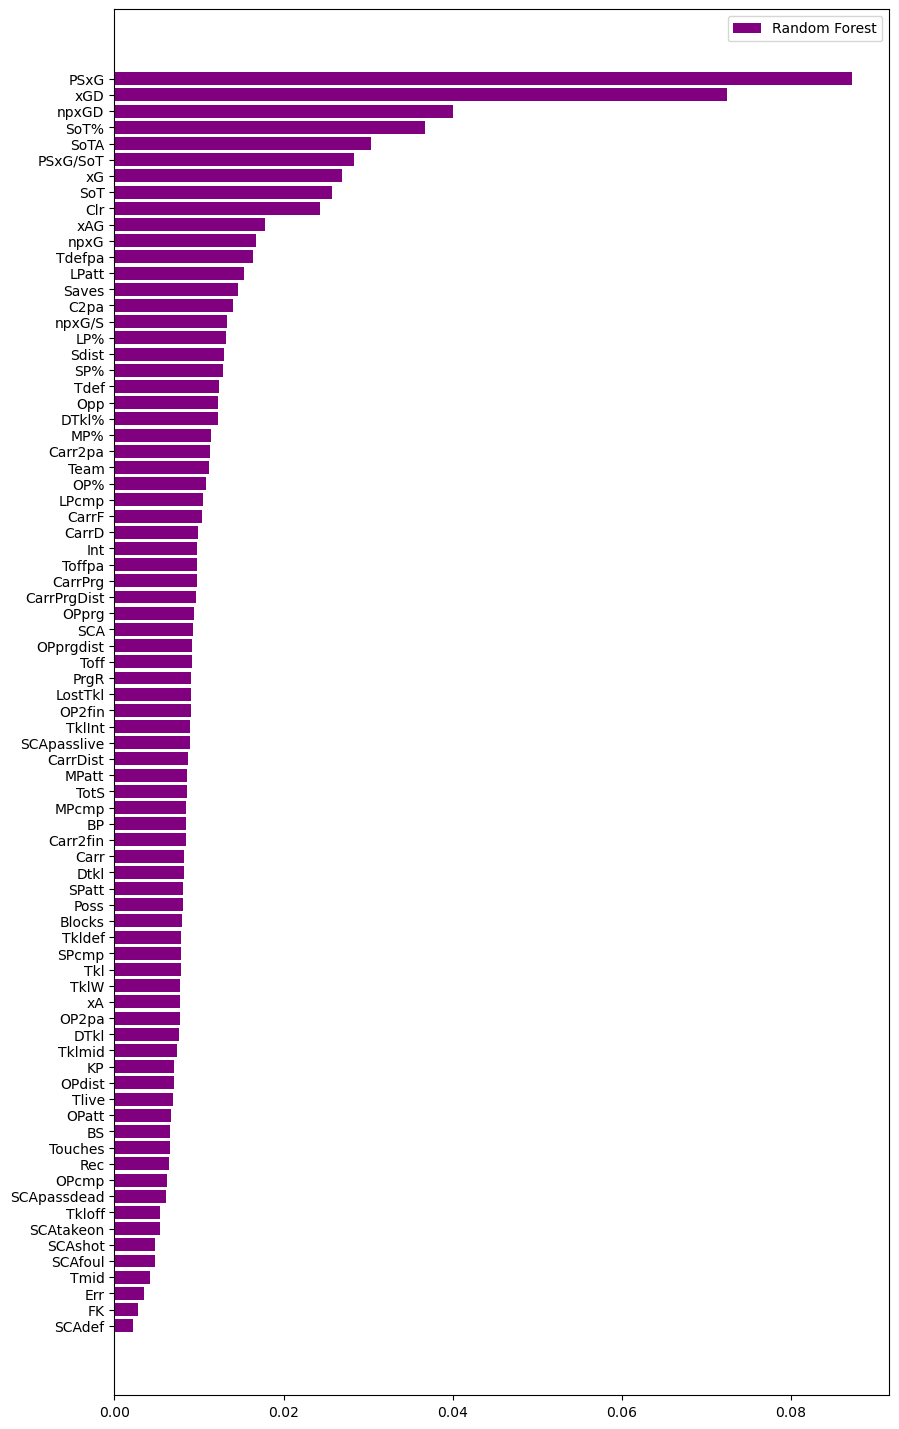

In [232]:
feature_importance = pd.DataFrame({'rfc':rfc.feature_importances_},index = df_EPL.drop(columns=['Date', 'Result',
                                  'GF', 'GA', 'GD', 'G-PG', 'PG', 'PKatt','PKm', 'G-xG', 'npG-npxG', 'A-xAG', 'PSxG-GA',
                                'Save%', 'G/S', 'G/SoT']).columns)
feature_importance.sort_values('rfc',ascending = True,inplace = True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize = (10,18))
rfc_feature = ax.barh(index, feature_importance['rfc'], color = 'purple', label = 'Random Forest')
ax.set(yticks = index , yticklabels = feature_importance.index)

ax.legend()
plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()

# RFC WITH OPP INFO

In [264]:
import os

files = [file for file in os.listdir ('./EPL_teams_2223')]
all_months_data=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_2223", file)) # This line!
    all_months_data= pd.concat ([all_months_data, df])
all_months_data.to_csv("EPL_teams_2223.csv",index= False)